In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
sns.set_style("white")

### Brazil Zika Data
https://github.com/cdcepi/zika


http://portalsaude.saude.gov.br/index.php/o-ministerio/principal/leia-mais-o-ministerio/197-secretaria-svs/20799-microcefalia


In [3]:
import os  ## Need packages to import various files
import glob ## Need packages to import various files

path = "/Users/Javier/Desktop/DSI-SF-1-MAJACACI00/projects/capstone/Zika_data/zika/Brazil/COES_Microcephaly/data/"
allFiles = glob.glob(os.path.join(path,"*.csv"))


np_array_list = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    np_array_list.append(df.as_matrix())

comb_np_array = np.vstack(np_array_list)
brazil_frame = pd.DataFrame(comb_np_array, columns = ['report_date', 'location', 'location_type', 'data_field', 
                                                      'data_field_code', 'time_period', 'time_period_type', 'value', 'unit'])


In [4]:
brazil_frame.head(2)

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-02-13,Brazil-Acre,state,microcephaly_under_investigation,BR0001,NaN,NaN,22,cases
1,2016-02-13,Brazil-Alagoas,state,microcephaly_under_investigation,BR0001,NaN,NaN,90,cases


In [5]:
# Min and Max Report Date
print "min report date", brazil_frame.report_date.min()
print "max report date", brazil_frame.report_date.max()

min report date 2016-02-13
max report date 2016-06-04


In [6]:
## Removing colums I dont need
brazil_frame = brazil_frame.drop(['location_type', 'data_field_code', 'time_period_type', 'time_period', 'unit'], axis=1)

In [7]:
## Creating Country column 
brazil_frame['country'] = brazil_frame['location']
brazil_frame['country'] = brazil_frame['country'].apply(lambda x: pd.Series(x.split('-')))
brazil_frame.country.unique()

array(['Brazil'], dtype=object)

In [8]:
## Creating state/city column 
foo = lambda x: pd.Series([i for i in reversed(x.split('-'))])
brazil_frame['location'] = brazil_frame.location.apply(foo)
brazil_frame.rename(columns={'location':'state_city'}, inplace=True)

In [9]:
## Cleaning the state city column
brazil_frame.state_city = brazil_frame.state_city.map(lambda x: x.replace('_',' '))
brazil_frame.state_city.value_counts()

Goias                  132
Rio Grande do Norte    132
Pernambuco             132
Piaui                  132
Bahia                  132
Paraiba                132
Alagoas                132
Ceara                  132
Maranhao               131
Sao Paulo              131
Sergipe                131
Minas Gerais           131
Parana                 131
Acre                   131
Mato Grosso            131
Rio Grande do Sul      123
Distrito Federal       122
Espirito Santo         120
Rio de Janeiro         120
Tocantins              119
Amapa                  104
Roraima                 95
Santa Catarina          92
Rondonia                89
Para                    87
Mato Grosso do Sul      84
Amazonas                83
Name: state_city, dtype: int64

In [10]:
## Changing the order of the columns
def order(frame,var):
    varlist =[w for w in frame.columns if w not in var]
    frame = frame[var+varlist]
    return frame

brazil_frame = order(brazil_frame,['report_date','country', 'state_city'])

In [11]:
## Keeping microcephaly_confirmed and microcephaly_fatal_confirmed
mask_conf = (brazil_frame['data_field'] == "microcephaly_confirmed") | (brazil_frame['data_field'] == "microcephaly_fatal_confirmed")
brazil_frame = brazil_frame[mask_conf]
print brazil_frame.data_field.value_counts()
print "++++++++++++++"

microcephaly_confirmed          459
microcephaly_fatal_confirmed    319
Name: data_field, dtype: int64
++++++++++++++


In [12]:
# Function to convert to numeric
def int_replace(x):
    try:
        return int(x)
    except:
        return np.nan_to_num(x)

brazil_frame.value = brazil_frame.value.map(int_replace)
brazil_frame.value = brazil_frame.value.astype(int)
print brazil_frame.value.dtype

int64


In [13]:
# ## Creating Dummy Variables
# brazil_frame['micro_conf'] = [1 if x == "microcephaly_confirmed" else 0 for x in brazil_frame['data_field'] ]
# brazil_frame['micro_conf_fetal'] = [1 if x == "microcephaly_fatal_confirmed" else 0 for x in brazil_frame['data_field'] ]

In [14]:
print "Shape of data:", brazil_frame.shape
print "++++++++++++++\n"
print "Missing values:\n"
print brazil_frame.isnull().sum()
print "++++++++++++++\n"
print brazil_frame.info()
print "++++++++++++++\n"

Shape of data: (778, 5)
++++++++++++++

Missing values:

report_date    0
country        0
state_city     0
data_field     0
value          0
dtype: int64
++++++++++++++

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 27 to 3160
Data columns (total 5 columns):
report_date    778 non-null object
country        778 non-null object
state_city     778 non-null object
data_field     778 non-null object
value          778 non-null int64
dtypes: int64(1), object(4)
memory usage: 36.5+ KB
None
++++++++++++++



In [15]:
brazil_frame.sort('report_date', ascending=True)
brazil_frame.head(2)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,report_date,country,state_city,data_field,value
27,2016-02-13,Brazil,Acre,microcephaly_confirmed,0
28,2016-02-13,Brazil,Alagoas,microcephaly_confirmed,25


In [16]:
brazil_frame[brazil_frame.state_city == 'Acre']

,report_date,country,state_city,data_field,value
27,2016-02-13,Brazil,Acre,microcephaly_confirmed,0
109,2016-02-13,Brazil,Acre,microcephaly_fatal_confirmed,0
139,2016-02-20,Brazil,Acre,microcephaly_confirmed,0
274,2016-02-20,Brazil,Acre,microcephaly_fatal_confirmed,0
319,2016-02-27,Brazil,Acre,microcephaly_confirmed,0
454,2016-02-27,Brazil,Acre,microcephaly_fatal_confirmed,0
499,2016-03-05,Brazil,Acre,microcephaly_confirmed,0
634,2016-03-05,Brazil,Acre,microcephaly_fatal_confirmed,0
688,2016-03-12,Brazil,Acre,microcephaly_confirmed,0
823,2016-03-12,Brazil,Acre,microcephaly_fatal_confirmed,0


In [17]:
## Reshaping the Data
brazil_zika = pd.pivot_table(brazil_frame,
                             index=['country','state_city','report_date'],
                             columns=['data_field'],values=['value'],
                             aggfunc=sum)
brazil_zika = brazil_zika['value'].reset_index()


In [18]:
print brazil_zika.columns
print "++++++++++"
brazil_zika.head(10)

Index([u'country', u'state_city', u'report_date', u'microcephaly_confirmed',
       u'microcephaly_fatal_confirmed'],
      dtype='object', name=u'data_field')
++++++++++


data_field,country,state_city,report_date,microcephaly_confirmed,microcephaly_fatal_confirmed
0,Brazil,Acre,2016-02-13,0.0,0.0
1,Brazil,Acre,2016-02-20,0.0,0.0
2,Brazil,Acre,2016-02-27,0.0,0.0
3,Brazil,Acre,2016-03-05,0.0,0.0
4,Brazil,Acre,2016-03-12,0.0,0.0
5,Brazil,Acre,2016-03-19,0.0,0.0
6,Brazil,Acre,2016-03-26,0.0,0.0
7,Brazil,Acre,2016-04-02,1.0,0.0
8,Brazil,Acre,2016-04-09,0.0,0.0
9,Brazil,Acre,2016-04-16,0.0,0.0


In [19]:
## Making Report date the index
print brazil_zika.report_date.dtype 
print "++++++++++++++"
brazil_zika.sort_values("report_date", inplace=True)
brazil_zika.set_index("report_date", inplace=True)
brazil_zika.index = brazil_zika.index.to_datetime()

object
++++++++++++++


In [20]:
## Now creating a year, month and day column
brazil_zika['year'] = brazil_zika.index.year
brazil_zika['month'] = brazil_zika.index.month
brazil_zika['day'] = brazil_zika.index.day

In [21]:
brazil_zika['microcephaly_fatal_confirmed'].fillna(0, inplace=True)
brazil_zika['microcephaly_confirmed'].fillna(0, inplace=True)
brazil_zika['microcephaly_confirmed'] = brazil_zika.microcephaly_confirmed.astype(int)
brazil_zika['microcephaly_fatal_confirmed'] = brazil_zika.microcephaly_fatal_confirmed.astype(int)

In [22]:
print brazil_zika.info()
print "++++++++++++++\n"
print brazil_zika.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 459 entries, 2016-02-13 to 2016-06-04
Data columns (total 7 columns):
country                         459 non-null object
state_city                      459 non-null object
microcephaly_confirmed          459 non-null int64
microcephaly_fatal_confirmed    459 non-null int64
year                            459 non-null int32
month                           459 non-null int32
day                             459 non-null int32
dtypes: int32(3), int64(2), object(2)
memory usage: 23.3+ KB
None
++++++++++++++

(459, 7)


In [23]:
brazil_zika.head()

data_field,country,state_city,microcephaly_confirmed,microcephaly_fatal_confirmed,year,month,day
2016-02-13,Brazil,Acre,0,0,2016,2,13
2016-02-13,Brazil,Sao Paulo,0,0,2016,2,13
2016-02-13,Brazil,Amazonas,0,0,2016,2,13
2016-02-13,Brazil,Espirito Santo,3,0,2016,2,13
2016-02-13,Brazil,Amapa,0,0,2016,2,13


In [24]:
brazil_zika.head(2)

data_field,country,state_city,microcephaly_confirmed,microcephaly_fatal_confirmed,year,month,day
2016-02-13,Brazil,Acre,0,0,2016,2,13
2016-02-13,Brazil,Sao Paulo,0,0,2016,2,13


In [68]:
brazil_zika.describe().T

,count,mean,std,min,25%,50%,75%,max
data_field,,,,,,,,
microcephaly_confirmed,459.0,39.568627,70.519169,0.0,1.0,5.0,55.5,363.0
microcephaly_fatal_confirmed,459.0,1.681917,3.487207,0.0,0.0,0.0,1.5,18.0
year,459.0,2016.000000,0.000000,2016.0,2016.0,2016.0,2016.0,2016.0
month,459.0,3.764706,1.165917,2.0,3.0,4.0,5.0,6.0
day,459.0,16.235294,8.683492,2.0,9.0,16.0,23.0,30.0


In [25]:
## Creting Data Frame for graphs by state and date
brazil_zika_ = brazil_zika.reset_index()
brazil_zika_ = brazil_zika_.rename(columns={'index':'date'})
brazil_gb = brazil_zika_.groupby(['state_city','date']).sum()

In [26]:
brazil_gb = brazil_gb.reset_index()

In [27]:
print brazil_gb.columns
brazil_gb.head(3)

Index([u'state_city', u'date', u'microcephaly_confirmed',
       u'microcephaly_fatal_confirmed', u'year', u'month', u'day'],
      dtype='object', name=u'data_field')


data_field,state_city,date,microcephaly_confirmed,microcephaly_fatal_confirmed,year,month,day
0,Acre,2016-02-13,0,0,2016,2,13
1,Acre,2016-02-20,0,0,2016,2,20
2,Acre,2016-02-27,0,0,2016,2,27


In [28]:
brazil_gb['state_city'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Para',
       'Paraiba', 'Parana', 'Pernambuco', 'Piaui', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondonia', 'Roraima',
       'Santa Catarina', 'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [29]:
def plot_num_ts(df, seq_col, seq):
    cat = df[seq_col].unique()
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca()
    for i in cat:
        df_ = df[df[seq_col] == i]
        df_ = df_.set_index('date')
        df_ = df_.resample(seq).sum()
        ax.plot(df_['microcephaly_confirmed'], lw=1.5, linestyle='dashed', marker='o',
                markerfacecolor='red', markersize=5,
                label="Confirmed cases in %s"%i)
        
    plt.legend(loc='best', fontsize=10, bbox_to_anchor=(0., 1.02, 1., .102),ncol=3)
    plt.xlabel('\nTime progression in %s'%seq)
    plt.ylabel("Total Microcephaly Cases\n")
    plt.show()

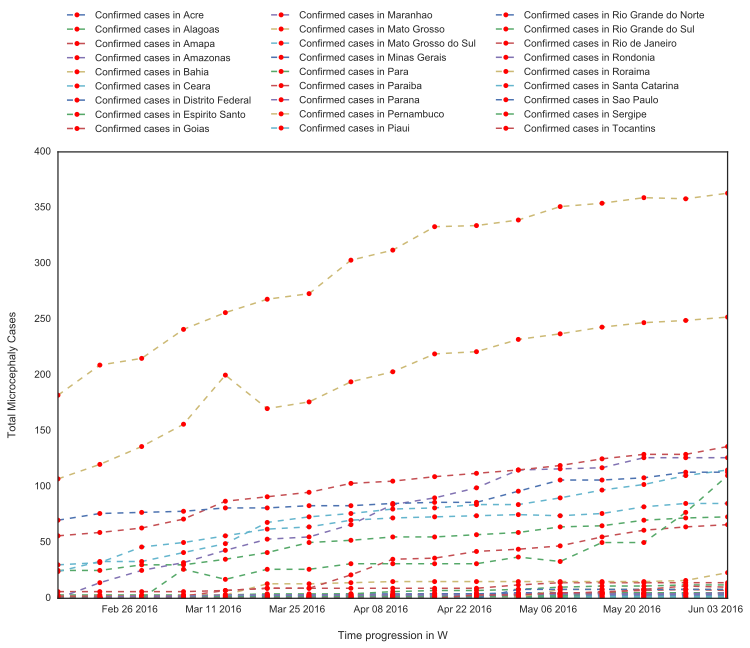

In [30]:
plot_num_ts(brazil_gb, 'state_city', 'W')

In [31]:
def plot_num_ts(num, seq):
    
    num = num.sort_index(ascending = False)
    num = num.resample(seq).sum()
    mask = np.isfinite(num['microcephaly_confirmed'])
    fig = plt.figure(figsize=(12,5))
    ax = fig.gca()
    ax.plot(num['microcephaly_confirmed'][mask], c='y', lw=3, linestyle='dashed', marker='o',
                markerfacecolor='red', markersize=5,
            label="Brazil - number of microcephaly confirmed cases (Feb-Jun 2016) per %s"%seq)
    plt.legend(loc='best')
    
    plt.xlabel('\nTime progression in %s'%seq)
    plt.ylabel("Microcephaly confirmed cases\n")
    plt.show()

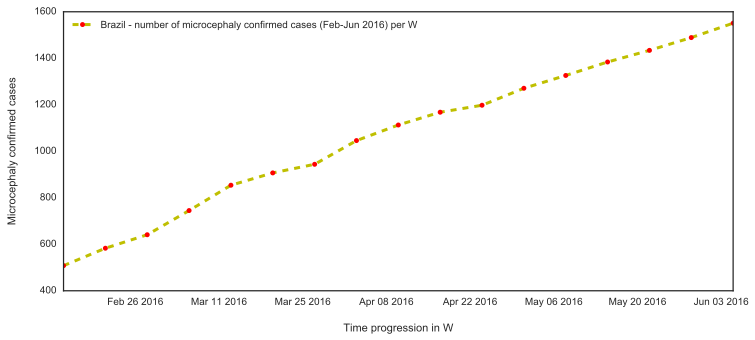

In [32]:
plot_num_ts(brazil_zika, "W")
# M
# D
# W


Notes: Reading the information from the PDFs, each count of microcephaly cases refers to new cases, THEY ARE NOT 
cumulative cases. Meaning that the number of cases reported in one day are independent of the number of cases
reported on the previous days.

Therefore the sum of cases that ocurr on each month, is the total sum of cases of the month

In [33]:
# brazil_zika[brazil_zika['state_city']=="Alagoas"]

In [34]:
import cPickle
f = open('brazil_zika_wdates.p', 'wb')
cPickle.dump(brazil_zika, f)
f.close()

In [35]:
brazil_zika.groupby(['month', 'state_city','day']).sum().head(100)

data_field                  microcephaly_confirmed  \
month state_city       day                           
2     Acre             13                        0   
                       20                        0   
                       27                        0   
      Alagoas          13                       25   
                       20                       25   
                       27                       30   
      Amapa            13                        0   
                       20                        0   
                       27                        0   
      Amazonas         13                        0   
                       20                        0   
                       27                        0   
      Bahia            13                      107   
                       20                      120   
                       27                      136   
      Ceara            13                       24   
                       20                       33   
                       27                       33   
      Distrito Federal 13                        0   
                       20                        0   
                       27                        0   
      Espirito Santo   13                        3   
                       20                        3   
                       27                        3   
      Goias            13                        6   
                       20                        6   
                       27                        6   
      Maranhao         13                        0   
                       20                       14   
                       27                       25   
...                                            ...   
      Santa Catarina   20                        0   
                       27                        0   
      Sao Paulo        13                        0   
                       20                        0   
                       27                        0   
      Sergipe          13                        0   
                       20                        0   
                       27                        0   
      Tocantins        13                        0   
                       20                        0   
                       27                        0   
3     Acre             5                         0   
                       12                        0   
                       19                        0   
                       26                        0   
      Alagoas          5                        30   
                       12                       35   
                       19                       41   
                       26                       50   
      Amapa            5                         0   
                       12                        0   
                       19                        0   
                       26                        0   
      Amazonas         5                         0   
                       12                        0   
                       19                        0   
                       26                        1   
      Bahia            5                       156   
                       12                      200   
                       19                      170   

data_field                  microcephaly_fatal_confirmed  year  
month state_city       day                                      
2     Acre             13                              0  2016  
                       20                              0  2016  
                       27                              0  2016  
      Alagoas          13                              2  2016  
                       20                              2  2016  
                       27                              2  2016  
      Amapa            13                              0  2016  
            

In [36]:
## Grouping
print brazil_zika.columns
print "========"
grouped = brazil_zika.groupby(['state_city'])
# 
grouped_val = grouped['microcephaly_confirmed', 'microcephaly_fatal_confirmed']
brazil_microcep =  grouped_val.agg((np.sum)).reset_index()
brazil_microcep

Index([u'country', u'state_city', u'microcephaly_confirmed',
       u'microcephaly_fatal_confirmed', u'year', u'month', u'day'],
      dtype='object', name=u'data_field')


data_field,state_city,microcephaly_confirmed,microcephaly_fatal_confirmed
0,Acre,1,0
1,Alagoas,858,44
2,Amapa,50,0
3,Amazonas,36,0
4,Bahia,3362,7
5,Ceara,1240,219
6,Distrito Federal,54,9
7,Espirito Santo,111,17
8,Goias,167,0
9,Maranhao,1287,0


In [37]:
# import cPickle
# # f = open('locations.save', 'wb')
# # cPickle.dump(locations,f)
# # f.close()

### Visualization

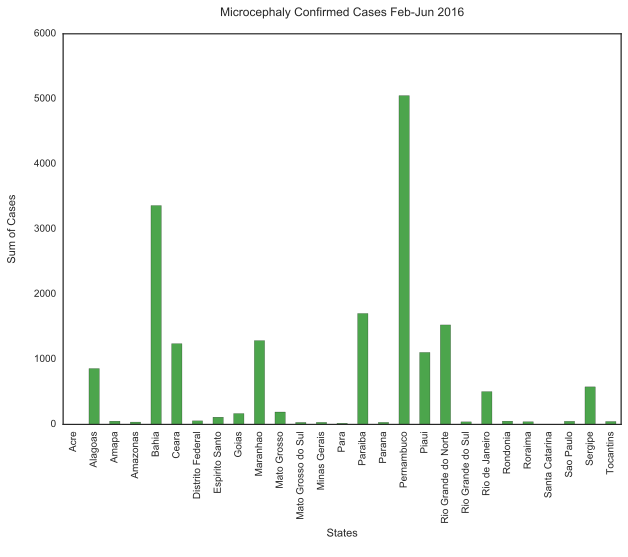

In [83]:
grouped = brazil_zika.groupby(['state_city'])
##
grouped_val_1 = grouped['microcephaly_confirmed']
category_group_1=grouped_val_1.sum()
##
grouped_val_2 = grouped['microcephaly_fatal_confirmed']
category_group_2=grouped_val_2.sum()
##
# category_group_1
# print "+++++++++"

plt.figure(figsize=(10,7))
braz_microc_conf_1 = category_group_1.plot(kind='bar', color='green', alpha=0.7, title= "Microcephaly Confirmed Cases Feb-Jun 2016\n")
braz_microc_conf_1.set_xlabel("States\n")
braz_microc_conf_1.set_ylabel("Sum of Cases\n")
plt.show()


state_city
Santa Catarina     0
Sao Paulo          0
Sergipe           43
Tocantins          1
Name: microcephaly_fatal_confirmed, dtype: int64
++++++++


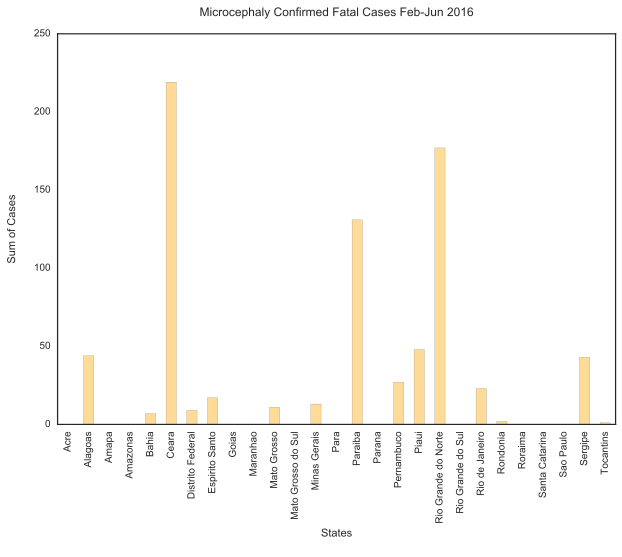

In [39]:
print category_group_2.tail(4)
print "++++++++"

plt.figure(figsize=(10,7))
braz_microc_conf_2 = category_group_2.plot(kind='bar', color='orange', alpha=0.4, title= "Microcephaly Confirmed Fatal Cases Feb-Jun 2016\n")
braz_microc_conf_2.set_xlabel("States\n")
braz_microc_conf_2.set_ylabel("Sum of Cases\n")
plt.show()

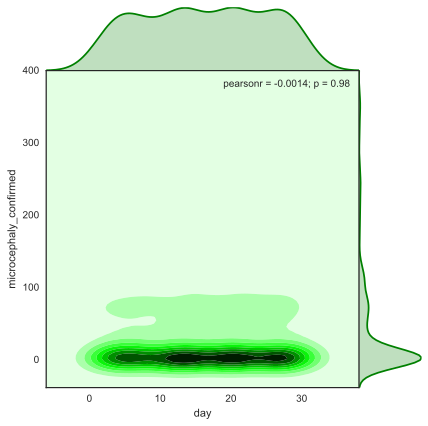

In [40]:
sns.jointplot(x="day", y="microcephaly_confirmed", data=brazil_zika, kind="kde", space=0, color="g")

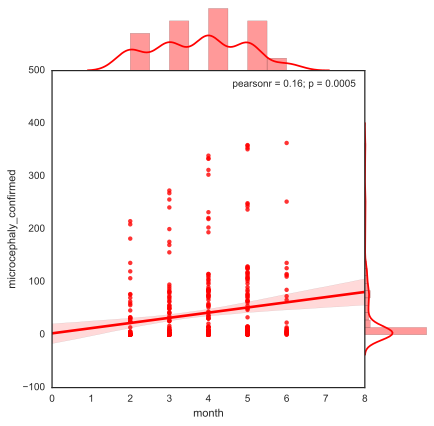

In [41]:
sns.jointplot(x="month", y="microcephaly_confirmed", data=brazil_zika, kind="reg", space=0, color="red")

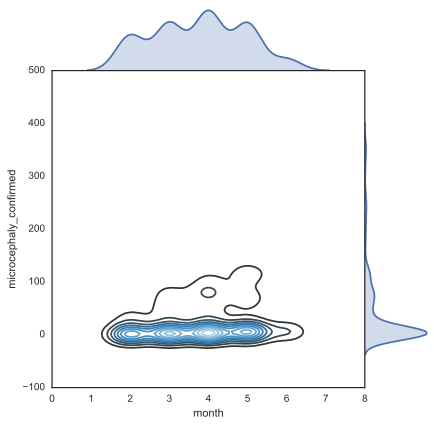

In [42]:
from scipy.stats import spearmanr
g = sns.JointGrid(x="month", y="microcephaly_confirmed",data=brazil_zika, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)

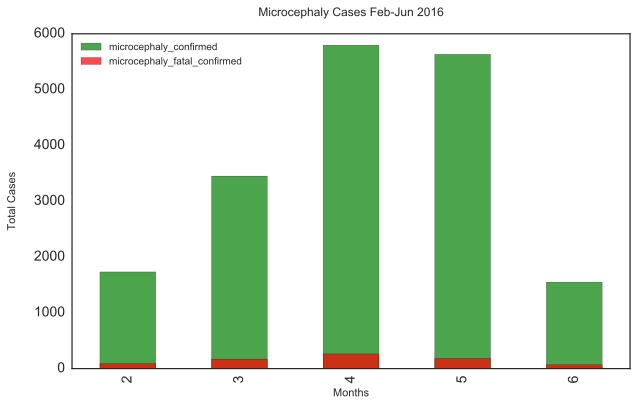

In [43]:
grouped = brazil_zika.groupby(['month'])
##
grouped_val = grouped['microcephaly_confirmed']
category_group=grouped_val.sum()
#
grouped_val_1 = grouped['microcephaly_fatal_confirmed']
category_group_1=grouped_val_1.sum()


plt.figure(figsize=(10,6))

braz_graph= category_group.plot(kind='bar', color='green', alpha=0.7, 
                                title= "Microcephaly Cases Feb-Jun 2016\n", label="microcephaly_confirmed")
braz_graph_1= category_group_1.plot(kind='bar', color='red', alpha=0.7)

braz_graph.set_xlabel("Months\n")
braz_graph.set_ylabel("Total Cases\n")

plt.tick_params(labelsize=14)
plt.legend(loc='upper left')
plt.show()


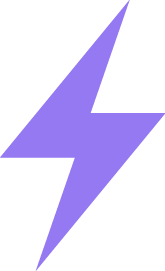

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [44]:
from lightning import Lightning
from seaborn import color_palette
from colorsys import hsv_to_rgb
import os
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

In [45]:
plt.figure(figsize=(20,12))
x = brazil_zika['month']
y = brazil_zika['microcephaly_fatal_confirmed']
c = [145,117,240]
s = 5
lgn.scatter(x, y,color=c,size=s,
            xaxis='Months', yaxis='Microcephaly Fatal Cases', width=500)

//anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [46]:
# plt.figure(figsize=(20,12))
# lgn.histogram(brazil_zika['microcephaly_confirmed'], 25, zoom=True, width=500)

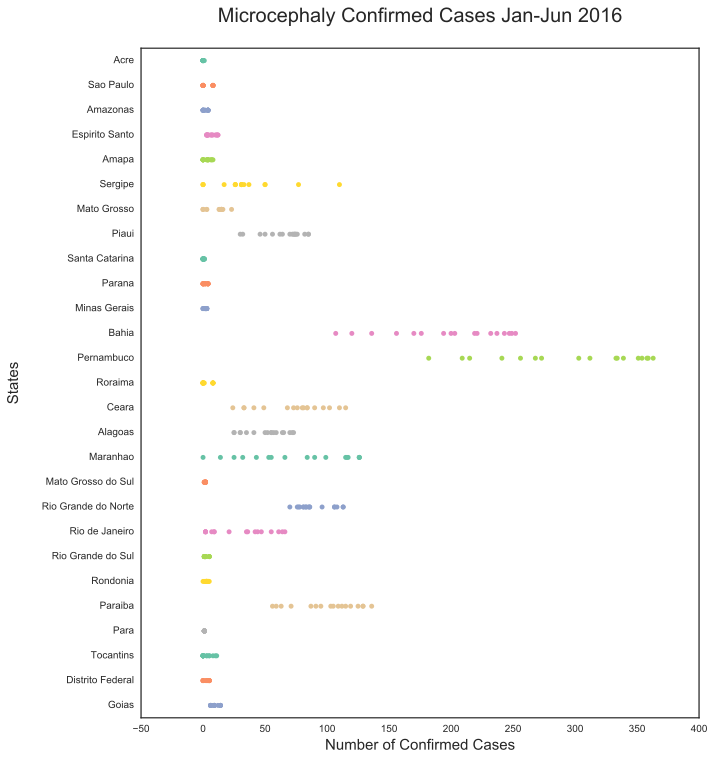

In [47]:
## Confirmed Cases by State
plt.figure(figsize=(10,12))
f = sns.stripplot(x="microcephaly_confirmed", y="state_city", palette="Set2", data=brazil_zika)

sns.plt.title("Microcephaly Confirmed Cases Jan-Jun 2016\n", fontsize =20)
sns.plt.xlabel("Number of Confirmed Cases\n ", fontsize = 15)
sns.plt.ylabel("States\n", fontsize = 15)

### Adding Geo Locations

In [48]:
pwd

u'/Users/Javier/Desktop/DSI-SF-1-MAJACACI00/projects/capstone/Zika_data/zika_code'

In [49]:
import cPickle
f = open('locations.save', 'rb')
locations = cPickle.load(f)
f.close()

In [50]:
locations.head(2)

,state_ct,latitude,longitude
0,Acre,-9.30872154236,-70.4464645386
1,Sao Paulo,-23.5628395081,-46.6546401978


In [51]:
# locations = locations.drop(['cart_key'], axis=1)

In [52]:
locations.rename(columns={'state_ct': 'state_city'}, inplace=True)

In [53]:
print locations.columns
print "++++++++++++++++\n"
print brazil_zika.shape, locations.shape
print "++++++++++++++++\n"
locations.head(2)

Index([u'state_city', u'latitude', u'longitude'], dtype='object')
++++++++++++++++

(459, 7) (27, 3)
++++++++++++++++



,state_city,latitude,longitude
0,Acre,-9.30872154236,-70.4464645386
1,Sao Paulo,-23.5628395081,-46.6546401978


In [54]:
brazil_zika_geo = pd.merge(brazil_zika, locations, on='state_city', how='outer')
print "++++++++++++++++\n"
print brazil_zika_geo.shape
print "++++++++++++++++\n"
print brazil_zika_geo.isnull().sum()
print "++++++++++++++++\n"
print brazil_zika_geo.info()

++++++++++++++++

(459, 9)
++++++++++++++++

data_field
country                         0
state_city                      0
microcephaly_confirmed          0
microcephaly_fatal_confirmed    0
year                            0
month                           0
day                             0
latitude                        0
longitude                       0
dtype: int64
++++++++++++++++

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 0 to 458
Data columns (total 9 columns):
country                         459 non-null object
state_city                      459 non-null object
microcephaly_confirmed          459 non-null int64
microcephaly_fatal_confirmed    459 non-null int64
year                            459 non-null int32
month                           459 non-null int32
day                             459 non-null int32
latitude                        459 non-null object
longitude                       459 non-null object
dtypes: int32(3), int64(2), object(4)
me

In [55]:
brazil_zika_geo.head(3)

data_field,country,state_city,microcephaly_confirmed,microcephaly_fatal_confirmed,year,month,day,latitude,longitude
0,Brazil,Acre,0,0,2016,2,13,-9.30872154236,-70.4464645386
1,Brazil,Acre,0,0,2016,2,20,-9.30872154236,-70.4464645386
2,Brazil,Acre,0,0,2016,2,27,-9.30872154236,-70.4464645386


In [56]:
brazil_zika_geo['latitude'] = brazil_zika_geo['latitude'].convert_objects(convert_numeric=True)
brazil_zika_geo['longitude'] = brazil_zika_geo['longitude'].convert_objects(convert_numeric=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [57]:
#userdat.convert_objects(convert_numeric=True)
print brazil_zika_geo.latitude.dtype
print "+++++++++++++++++++++++\n"
print brazil_zika_geo.latitude.unique()
print "+++++++++++++++++++++++\n"
print brazil_zika_geo.longitude.dtype
print "+++++++++++++++++++++++\n"
print brazil_zika_geo.longitude.unique()
print "+++++++++++++++++++++++\n"

float64
+++++++++++++++++++++++

[ -9.30872154 -23.56283951  -4.18510246 -19.57513809   1.44229305
 -10.58662891 -12.94885731  -7.3909893  -27.24471474 -24.63589096
 -18.45622444 -12.4743185   -8.32205963   5.18171501  -5.08234787
  -9.51370525  -2.58827996 -20.32710457  -5.83891535 -22.91216087
 -29.78607178 -10.91191292  -7.11526012  -3.97891903 -10.14875412
 -15.78359985 -16.04179001]
+++++++++++++++++++++++

float64
+++++++++++++++++++++++

[-70.44646454 -46.6546402  -64.69913483 -40.67124939 -51.94958496
 -37.44630051 -55.91264343 -42.9706955  -50.49158096 -51.61701202
 -44.67345428 -41.72491455 -38.00611114 -60.76103973 -39.61870193
 -36.62326431 -44.19760132 -54.84552002 -36.67808533 -43.17501068
 -53.24562454 -62.84405136 -34.86104965 -53.0699234  -48.33231354
 -47.88050079 -49.6232338 ]
+++++++++++++++++++++++



In [64]:
from IPython.core.display import HTML
import folium
from folium import plugins

map_osm = folium.Map(location=[brazil_zika_geo.latitude.mean(), brazil_zika_geo.longitude.mean()], zoom_start=4)
                     

# icon_clas = folium.Icon(color='green', icon='arrow-up', angle=180)
for x,y in zip(brazil_zika_geo['latitude'], brazil_zika_geo['longitude']):
    map_osm.simple_marker(location = [x,y])

map_osm.create_map(path='osm.html')
map_osm

# import sys
# sys.path.insert(0,'..')
# import folium
# m = folium.Map(location=[41, -71], zoom_start=4)

# folium.Marker([41,-72], popup='something something...<br>',
#              icon=folium.Icon(color='green', icon='arrow-up', angle=180),
#               ).add_to(m)
# m

#map_osm.add_children(plugins.HeatMap([[x,y] for x in data.Latitude[:400] for y in data.Longitude[:400]]))
# N = 100
# range(N)
#plugins.MarkerCluster(brazil_zika_geo['microcephaly_confirmed']).add_to(map_osm)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: Map.create_map is deprecated. Use Map.save instead


### Static Map

In [59]:
brazil_micro_geo = pd.merge(brazil_microcep, locations, on='state_city', how='outer')
print "++++++++++++\n"
print brazil_micro_geo.shape
print "++++++++++++\n"
brazil_micro_geo.head(3)

++++++++++++

(27, 5)
++++++++++++



data_field,state_city,microcephaly_confirmed,microcephaly_fatal_confirmed,latitude,longitude
0,Acre,1,0,-9.30872154236,-70.4464645386
1,Alagoas,858,44,-9.5137052536,-36.6232643127
2,Amapa,50,0,1.4422930479,-51.9495849609


In [60]:
brazil_micro_geo['latitude'] = brazil_micro_geo['latitude'].convert_objects(convert_numeric=True)
brazil_micro_geo['longitude'] = brazil_micro_geo['longitude'].convert_objects(convert_numeric=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [61]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_file, ColumnDataSource
colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]


In [62]:
# state_names = [brazil_micro_geo['state_city'].values for x in brazil_micro_geo]
# state_names
# micro_confirmed = [brazil_micro_geo['microcephaly_confirmed'] for county_id in brazil_micro_geo]
# micro_confirmed
# state_colors = [colors[int(rate/3)] for rate in micro_confirmed]

# source = ColumnDataSource(data=dict(
#     x=brazil_micro_geo['latitude'], 
#     y=brazil_micro_geo['longitude'],
#     color=state_colors,
#     name=state_names,
#     rate=micro_confirmed,
# ))

In [63]:
# p.patches('x', 'y', source=source,
#           fill_color='color', fill_alpha=0.7,
#           line_color="white", line_width=0.5)

# hover = p.select_one(HoverTool)
# hover.point_policy = "follow_mouse"
# hover.tooltips = [
#     ("Name", "@name"),
#     ("Unemployment rate)", "@rate%"),
#     ("(Long, Lat)", "($x, $y)"),
# ]